In [14]:
import datamol as dm
from argo.frag_utils import SAFECodec
from argo.gen_models.f_rag.fusion.slicer import MolSlicerForSAFEEncoder

In [16]:
slicer = MolSlicerForSAFEEncoder(shortest_linker=True)
sfcodec = SAFECodec(slicer=slicer, ignore_stereo=True)

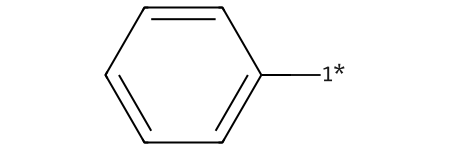

In [17]:
dm.to_mol('c1([1*])ccccc1')

In [3]:
import pandas as pd

chd1 = pd.read_csv("~/HIDDEN-GEM/CHD1/CHD1_gem.csv", nrows=10000)

In [4]:
chd1

,smiles,score
0,[O-]S(=O)(=O)c(c1N)cc(S([O-])(=O)=O)c(c12)ccc(...,-79.548950
1,[O-]S(=O)(=O)c(c1N)cc(S([O-])(=O)=O)c(c12)ccc(...,-76.969788
2,c1cnccc1Cn2nc(c(c23)cnc(n3)NCCC)-c4cnc(cc4)N5C...,-49.904549
3,CN1CCC2(CC1)CC(=NOC1CCCCC1)C1=CC=CC=C1O2,-49.661621
4,CCN1C=C(N=C2SC=C(C)N2CC2=CC(S(C)(=O)=O)=CC=C2)...,-48.614803
...,...,...
9995,CCN1N=CC(C2=CSC(=NCCC(N)=O)N2CCC2=NC(C)=CC=C2)=N1,-33.629707
9996,CC(C)C1=CN=C(CN2C=NC3=C(C4=C(CCCCC4)S3)C2=O)O1,-33.629402
9997,CCc1ccccc1C(=O)Nc2cc(CN3CCCC3)cc(c2)N4CCC(CC4)...,-33.629051
9998,COC(=O)C1=CC(N=C2SC=C(C3=C(C)C=CS3)N2C[C@@H]2C...,-33.628925


In [5]:
from rdkit import Chem
mols = [Chem.MolFromSmiles(x) for x in chd1['smiles']]

In [6]:
from argo.gen_models.f_rag.fusion.slicer import MolSlicerForSAFEEncoder
import safe as sf

slicer = MolSlicerForSAFEEncoder(shortest_linker=True)


/nas/longleaf/home/shuhang/miniconda3/envs/f-rag/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
fragments

['Cc1sc2nc4n(C)c(=O)c2c1C', 'c15ccsc1C#N', 'S4C5']

In [23]:
sfcodec._canonicalize_frag(sfcodec.decode('Cc1sc2nc4n(C)c(=O)c2c1C', remove_dummies=False))

'Cc1sc2nc(*)n(C)c(=O)c2c1C'

In [26]:
# Encode all molecules and collect fragments
all_fragments = []
print(f'Encoding {len(mols)} molecules...')
passing_mols = 0
for mol in mols:
    try:
        safe_str = sfcodec.encode(mol)
        fragments = safe_str.split('.')
        all_fragments.extend([sfcodec._canonicalize_frag(sfcodec.decode(frag, remove_dummies=False)) for frag in fragments])
        passing_mols += 1
    except Exception as e:
        pass
print(f'Passed {passing_mols} molecules')

# Count frequency of each fragment
from collections import Counter
fragment_counts = Counter(all_fragments)

Encoding 10000 molecules...
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 29 < 29
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 23 < 23
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:08] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 29 < 29
----------
Stacktrace:
----------
****

[19:36:08] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 23 < 23
----------
Stacktrace:
----------
****

[19:36:09] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 23 < 23
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:09] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:09] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****

[19:36:09] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 23 < 23
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:09] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:09] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:09] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:10] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 45 < 45
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:11] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:12] Explicit valence for atom # 11 N, 5, is greater than permitted
[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Explicit valence for atom # 11 N, 5, is greater than permitted.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Vi

[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:12] Can't kekulize mol.  Unkekulized atoms: 8 9 11 12 13 16 19 20 21
[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 23 < 23
----------
Stacktrace:
----------
****

[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****

[19:36:12] 

****
Range Error
idx
Violation occurred on line 218

Unable to encode: .
Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 8 9 11 12 13 16 19 20 21.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 23 < 23
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:12] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:13] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:13] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Explicit valence for atom # 11 N, 5, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 23 < 23
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp

[19:36:13] Explicit valence for atom # 11 N, 5, is greater than permitted
[19:36:13] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 23 < 23
----------
Stacktrace:
----------
****

[19:36:13] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:13] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8.
Unable to encode: .


[19:36:13] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8


Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:13] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:13] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 31 < 31
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 31 < 31
----------
Stacktrace:
----------
****

[19:36:14] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 11


Unable to encode: Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 11.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:14] Explicit valence for atom # 11 N, 5, is greater than permitted
[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****



Unable to encode: Explicit valence for atom # 11 N, 5, is greater than permitted.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:14] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 30 < 30
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 30 < 30
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Explicit valence for atom # 10 N, 4, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:15] Explicit valence for atom # 10 N, 4, is greater than permitted
[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:15] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 30 < 30
----------
Stacktrace:
----------
****

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 31 < 31
----------
Stacktrace:
----------
****

[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 31 < 31
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:16] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7
[19:36:16] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 33 < 33
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 33 < 33
----------
Stacktrace:
----------
****

[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 19 < 19
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 19 < 19
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Explicit valence for atom # 10 N, 4, is greater than permitted.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression:

[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:17] Explicit valence for atom # 10 N, 4, is greater than permitted
[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:17] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7 8 9


Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7 8 9.
Unable to encode: Explicit valence for atom # 16 N, 4, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:17] Explicit valence for atom # 16 N, 4, is greater than permitted
[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:17] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:18] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:18] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:18] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 13.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:18] Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 13
[19:36:18] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:18] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****

[19:36:18] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:18] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:18] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:19] Can't kekulize mol.  Unkekulized atoms: 5 6 7
[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 5 6 7.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 29 < 29
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 32 < 32
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 29 < 29
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 32 < 32
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 31 < 31
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 31 < 31
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 31 < 31
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 31 < 31
----------
Stacktrace:
----------
****

[19:36:19] Explicit valence for atom # 11 N, 5, is greater than permitted


Unable to encode: Explicit valence for atom # 11 N, 5, is greater than permitted.
Unable to encode: Explicit valence for atom # 10 N, 5, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 21 < 21
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 29 < 29
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:19] Explicit valence for atom # 10 N, 5, is greater than permitted
[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 21 < 21
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:19] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 29 < 29
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 21 < 21
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:20] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:20] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 21 < 21
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Explicit valence for atom # 15 N, 4, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:20] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:20] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:20] Explicit valence for atom # 15 N, 4, is greater than permitted
[19:36:20] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:20] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:20] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 31 < 31
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 31 < 31
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on li

[19:36:21] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:22] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:22] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:22] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 32 < 32
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:22] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:22] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 32 < 32
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:22] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:23] Explicit valence for atom # 16 N, 4, is greater than permitted
[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Explicit valence for atom # 16 N, 4, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression:

[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 29 < 29
----------
Stacktrace:
----------
****

[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:23] Explicit valence for atom # 10 N, 4, is greater than permitted
[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 i

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Explicit valence for atom # 10 N, 4, is greater than permitted.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:23] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:24] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****

[19:36:24] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:24] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:24] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 16 < 16
----------
Stacktrace:
----------
****

[19:36:24] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 16 < 16
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:24] Explicit valence for atom # 11 N, 5, is greater than permitted


Unable to encode: Explicit valence for atom # 11 N, 5, is greater than permitted.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:24] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 30 < 30
----------
Stacktrace:
----------
****

[19:36:24] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:24] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 30 < 30
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:25] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:25] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****

[19:36:25] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:25] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:25] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:25] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:25] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 20 < 20
----------
Stacktrace:
----------
****

[19:36:25] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 20 < 20
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 23 < 23
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 2

[19:36:26] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 29 < 29
----------
Stacktrace:
----------
****

[19:36:26] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:26] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:26] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:26] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:26] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15
[19:36:26] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Explicit valence for atom # 17 N, 5, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:26] Explicit valence for atom # 17 N, 5, is greater than permitted
[19:36:26] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:26] Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7 8 9


Unable to encode: .
Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 1 2 4 5 7 8 9.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:27] Explicit valence for atom # 11 N, 5, is greater than permitted


Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Explicit valence for atom # 11 N, 5, is greater than permitted.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression:

[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:27] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:28] Explicit valence for atom # 9 N, 4, is greater than permitted
[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Explicit valence for atom # 9 N, 4, is greater than permitted.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on l

[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 5 6 7.
Unable to encode: .
Unable to encode: Explicit valence for atom # 16 N, 5, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:28] Can't kekulize mol.  Unkekulized atoms: 5 6 7
[19:36:28] Explicit valence for atom # 16 N, 5, is greater than permitted
[19:36:28] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Explicit valence for atom # 10 N, 5, is greater than permitted.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:29] Explicit valence for atom # 10 N, 5, is greater than permitted
[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 i

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 21 < 21
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 3

[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:29] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:29] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
[19:36:29] Can't kekulize mol.  Unkekulized atoms: 4 5 7 8 10 12 14


Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Explicit valence for atom # 10 N, 5, is greater than permitted.


[19:36:30] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****

[19:36:30] Explicit valence for atom # 10 N, 5, is greater than permitted
[19:36:30] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:30] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:30] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:30] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:30] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13
[19:36:30] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:30] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:30] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 22 < 22
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .


[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 22 < 22
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 19 < 19
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 19 < 19
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 34 < 34
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:31] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 34 < 34
----------
Stacktrace:
----------
****

[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****



Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 21 < 21
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .


[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 21 < 21
----------
Stacktrace:
----------
****

[19:36:32] Explicit valence for atom # 15 N, 5, is greater than permitted


Unable to encode: .
Unable to encode: Explicit valence for atom # 15 N, 5, is greater than permitted.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 30 < 30
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 32 < 32
	RDKIT: 2025.03.3
	BOOST: 1_85
.


[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 30 < 30
----------
Stacktrace:
----------
****

[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 32 < 32
----------
Stacktrace:
----------
****

[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .


[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 27 < 27
----------
Stacktrace:
----------
****

[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 25 < 25
----------
Stacktrace:
----------
****

[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 28 < 28
----------
Stacktrace:
----------
****

[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 26 < 26
----------
Stacktrace:
----------
****

[19:36:32] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/RO

Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 25
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 28 < 28
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 26 < 26
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 27 < 27
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Unable to encode: .
Unable to encode: .
Unable to encode: Range Error
	idx
	Violation occurred on line 218 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 24 < 24
	RDKIT: 2025.03.3
	BOOST: 1_85
.
Passed 9228 molecules


[19:36:33] 

****
Range Error
idx
Violation occurred on line 218 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/GraphMol/ROMol.cpp
Failed Expression: 24 < 24
----------
Stacktrace:
----------
****



In [28]:
# Get top 20 fragments
top_20 = fragment_counts.most_common(30)

# Convert to list of tuples with size info
results = []
for smiles, count in top_20:
    mol = Chem.MolFromSmiles(smiles)
    size = mol.GetNumAtoms() if mol else 0
    results.append((smiles, count, size))

# Print in desired format
for smiles, count, size in results:
    print(f'{smiles},{count},{size}')

C#CCCN=c1scc(*)n1*,607,12
S(C*)*,514,4
c1(*)ccccc1,453,7
Cc1csc(=N*)n1*,301,9
N(=c1scc(C)n1*)*,289,9
C(S*)*,285,4
C(=CC(=O)*)*,271,6
C(C*)*,254,4
C(=C*)*,249,4
c1(*)cnn(C)c1,202,7
n1(*)c(C)csc1=N*,198,9
N(C(=O)*)*,167,5
C(=O)(C=C*)*,166,6
c1(*)ccnn1C,158,7
C1(*)CC1,151,4
C(c1ccccc1)*,118,8
c1(*)csc(=NCCC(N)=O)n1*,112,13
c1(*)ccccc1F,107,8
COc1ccccc1*,99,9
c1(*)ccoc1,93,6
S(CC*)*,93,5
n1(*)nnnc1*,93,7
c1(*)ccc(Cl)cc1,93,8
c1(*)ccco1,93,6
c1(*)ccc(F)cc1,90,8
C(=C(C#N)*)*,88,6
Cc1ccc(*)c(C)c1,84,9
COc1ccccc1-c1nnc(*)n1N,83,15
n1(*)c(*)csc1=NCCC(N)=O,83,13
C(=O)(N*)*,80,5


In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

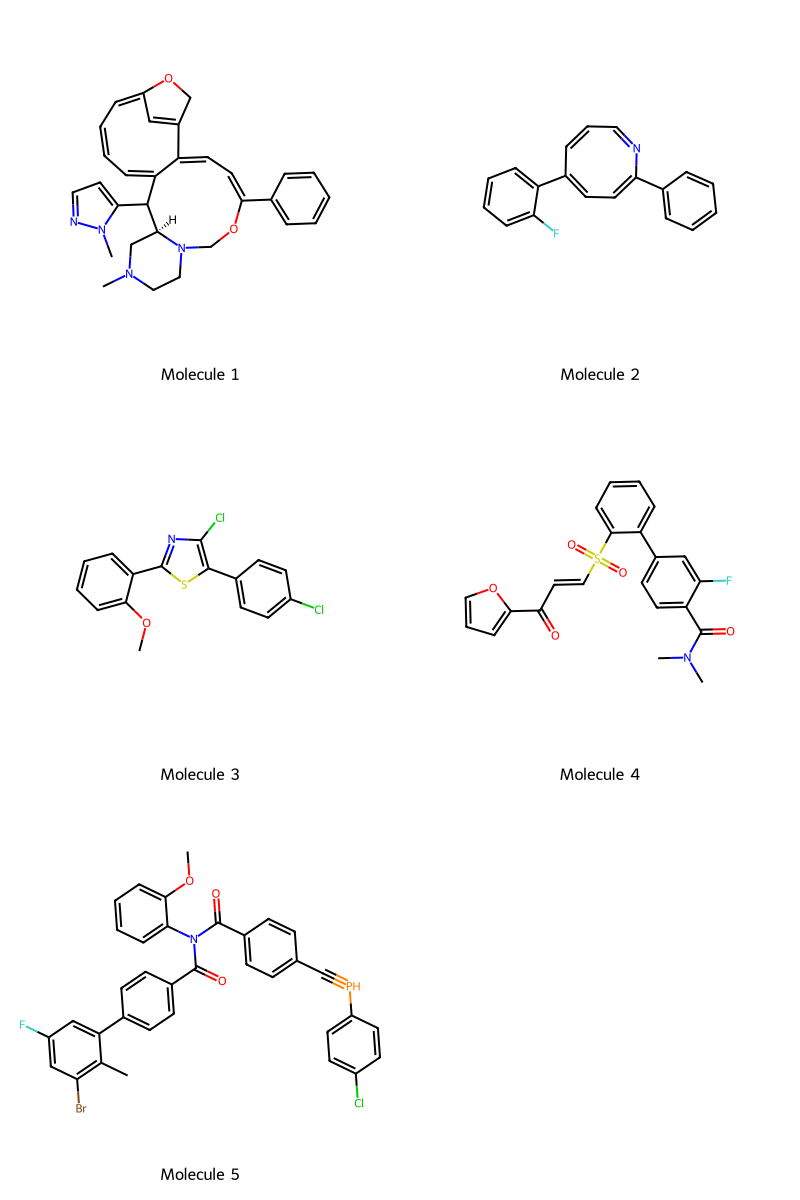

In [ ]:
# Create list of SMILES to draw
smiles_list = ['CN1CCN2COC(c3ccccc3)=CC=C3C4=CC(=CC=CC=C3C(c3ccnn3C)[C@@H]2C1)OC4', 'Fc1ccccc1C1=CC=C(c2ccccc2)N=CC=C1', 'COc1ccccc1-c1nc(Cl)c(-c2ccc(Cl)cc2)s1', 'CN(C)C(=O)c1ccc(-c2ccccc2S(=O)(=O)C=CC(=O)c2ccco2)cc1F', 'COc1ccccc1N(C(=O)c1ccc(C#[PH]c2ccc(Cl)cc2)cc1)C(=O)c1ccc(-c2cc(F)cc(Br)c2C)cc1']

# Convert SMILES to molecules
mols = [Chem.MolFromSmiles(s) for s in smiles_list]

# Draw molecules in a grid
img = Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(400,400), legends=[f"Molecule {i+1}" for i in range(len(mols))])
img
